# Example power spectrum plots
In this notebok, we provide a few example plots.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import hera_pspec as hp
from pyuvdata import UVData

First, we need to load some data and generate power spectra, using `PSpecData`.

In [2]:
# Load beam model
beamfile = '../hera_pspec/data/NF_HERA_Beams.beamfits'
cosmo = hp.conversions.Cosmo_Conversions()
uvb = hp.pspecbeam.PSpecBeamUV(beamfile, cosmo=cosmo)

# Load data into UVData objects
dfile = '../hera_pspec/data/zen.all.xx.LST.1.06964.uvA'
uvd = UVData()
uvd.read_miriad(dfile)

# We only have 1 data file here, so slide the time axis by one integration 
# to avoid noise bias (not normally needed!)
uvd1 = uvd.select(times=np.unique(uvd.time_array)[:-1:2], inplace=False)
uvd2 = uvd.select(times=np.unique(uvd.time_array)[1::2], inplace=False)

# Create a new PSpecData object
ds = hp.PSpecData(dsets=[uvd1, uvd2], wgts=[None, None], beam=uvb)
ds.rephase_to_dset(0) # Phase to the zeroth dataset

# bls is now a list of lists
bls = [[(24,25), (37,38), (38,39)]]

# Power spectrum calculation
uvp = ds.pspec(bls, bls, (0, 1), spw_ranges=[(300, 400), (600,721)], input_data_weight='identity', norm='I', 
               taper='blackman-harris', verbose=False)

In [3]:
blpairs = np.unique(uvp.blpair_array)

## Plot average power spectra
First, let's plot the LST- and baseline-pair-averaged power spectrum.

Baseline pairs: [24025024025, 24025037038, 24025038039, 37038024025, 37038037038, 37038038039, 38039024025, 38039037038, 38039038039]


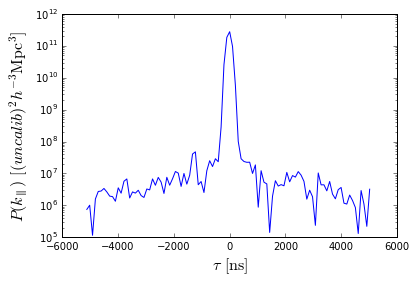

In [4]:
# Unpack the list of baseline-pairs into a Python list
blps = [blp for blp in blpairs]
print "Baseline pairs:", blps

# Plot the spectra averaged over baseline-pairs and times
ax = hp.plot.delay_spectrum(uvp, [blps,], spw=0, pol='xx', average_blpairs=True, average_times=True)

The UVData files contain 3 time bins; let's average over baseline-pairs but keep the time bins intact

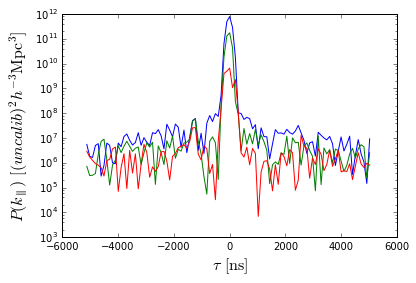

In [5]:
hp.plot.delay_spectrum(uvp, [blps,], spw=0, pol='xx', average_blpairs=True, average_times=False)

And now let's try the opposite: average over times, but keep the baseline-pairs separate.

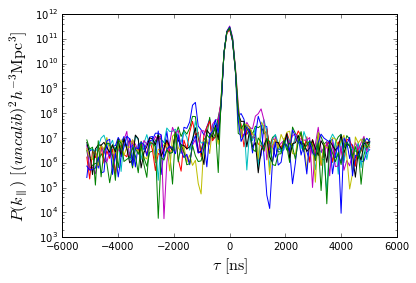

In [6]:
hp.plot.delay_spectrum(uvp, [blps,], spw=0, pol='xx', average_blpairs=False, average_times=True)

## Cosmological units
Now let's plot in cosmological units instead of delay units (make sure a cosmology is set first):

attaching cosmology: 
Cosmo_Conversions object at <0x7f3ca2dcd990>
Om_L : 0.6844; Om_b : 0.0491; Om_c : 0.2644; Om_M : 0.3135; Om_k : 0.0021; H0 : 67.2700


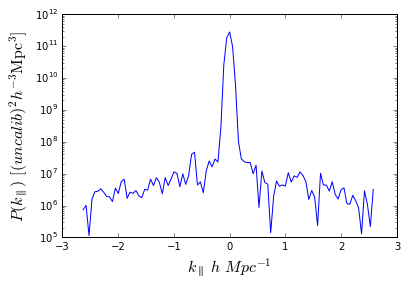

In [7]:
uvp.add_cosmology(hp.conversions.Cosmo_Conversions())
hp.plot.delay_spectrum(uvp, [blps,], spw=0, pol='xx', average_blpairs=True, average_times=True, 
                       delay=False, little_h=True)

We can also plot the dimensionless $\Delta^2$ power spectrum instead of the regular power spectrum:

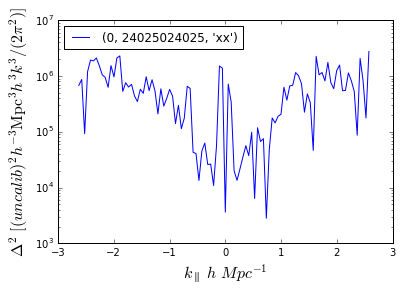

In [8]:
hp.plot.delay_spectrum(uvp, [blps,], spw=0, pol='xx', average_blpairs=True, average_times=True, 
                       delay=False, little_h=True, deltasq=True, legend=True)